## Introduction to Pandas



Before we jump into Pandas, let us review what we have considered so far.

First, we learned how to read data from files into numpy arrays. We learned how to use variables to store that data, and to either slice the array into a few variables, or use slices themselves for something. We also learned how to make a *record* array that enabled us to access columns of the array by a *name*.

When we loaded a json file, we got a *dictionary* data structure, which also allowed us to access data by a *name*.

Second, we imported a visualization library, and made plots that used the arrays as arguments.

For "small" data sets, i.e. not too many columns, this is a perfectly reasonable thing to do. For larger datasets, however, it can be tedious to create a lot of variable names, and it is also hard to remember what is in each column.

Many tasks are pretty standard, e.g. read a data set, summarize and visualize it. It would be nice if we had a simple way to do this, with few lines of code, since those lines will be the same every time.

The [Pandas](https://pandas.pydata.org/) library was developed to address all these issues. From the website: "**pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."



### Review of the numpy array way



Let's review what we learned already.



# Out [4]:
# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

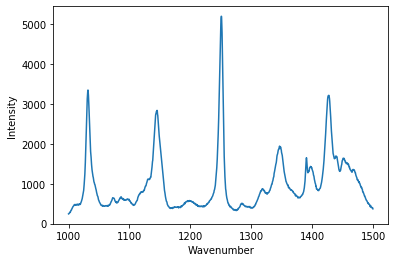

In [1]:
url = 'https://drive.google.com/uc?id=12HpXqZyjatSDcV2cb3p6LIVLyjDT1kQz'

import urllib.request
urllib.request.urlretrieve(url, '03-raman.txt')

import numpy as np
data = np.loadtxt('03-raman.txt')

wavenumber, intensity = data.T  # the transpose has data in rows for unpacking
ind = (wavenumber >= 1000) & (wavenumber < 1500)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(wavenumber[ind], intensity[ind])
plt.xlabel('Wavenumber')
plt.ylabel('Intensity');

### Now, with Pandas



We will unpack this code shortly. For now, look how short it is to create this plot. Note that we have condensed all the code in the example above basically into three lines of code. That is pretty remarkable, but should give you some pause. We now have to learn how to use such a dense syntax!



# Out [14]:


# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

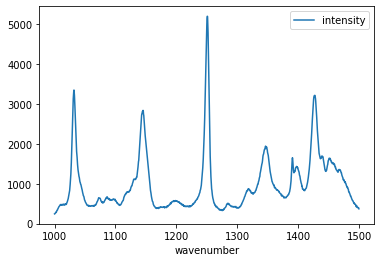

In [1]:
import pandas as pd

df = pd.read_csv('03-raman.txt', delimiter = '\t', index_col=0,
                 names=['wavenumber', 'intensity'])
df[(df.index >= 1000) & (df.index<1500)].plot()

And to summarize.



In [1]:
df.describe()

# Out [10]:
# text/plain
          intensity
count   7620.000000
mean     558.388392
std      982.659031
min       77.104279
25%      113.666535
50%      219.409340
75%      552.632848
max    15275.059000

What is the benefit of this dense syntax? Because it is so short, it is faster to type (at least, when you know what to type). That means it is also faster for you to read.

The downside is that it is like learning a whole new language within Python, and a new mental model for how the data is stored and accessed. You have to decide if it is worthwhile doing that. If you do this a lot, it is probably worthwhile.



## Pandas



The main object we will work with is called a `DataFrame`.



In [1]:
type(df)

# Out [15]:
# text/plain
pandas.core.frame.DataFrame

Jupyter notebooks can show you a fancy rendering of your dataframe.



In [1]:
df

# Out [16]:
# text/plain
             intensity
wavenumber
500.00000   294.378690
500.39374   288.922000
500.78751   286.066220
501.18124   275.222840
501.57501   275.119380
...                ...
3498.42500   86.151878
3498.81880   85.178947
3499.21240   87.969734
3499.60620   83.638931
3500.00000   84.009064
:
[7620 rows x 1 columns]

The dataframe combines a few ideas we used from arrays and dictionaries. First, we can access a column by name. When we do this, we get a `Series` object.



In [1]:
type(df['intensity'])

# Out [19]:
# text/plain
pandas.core.series.Series

You can extract the values into a numpy array like this.



In [1]:
df['intensity'].values

# Out [23]:
# text/plain
array([294.37869 , 288.922   , 286.06622 , ...,  87.969734,  83.638931,
        84.009064])

A Series (and DataFrame) are like numpy arrays in some ways, and different in others. Suppose we want to see the first five entries of the intensity. If we want to use *integer-based* indexing like we have so far, you have to use the `iloc` attribute on the series like this. `iloc` is for integer location.



In [1]:
df['intensity'].iloc[0:5]

# Out [27]:
# text/plain
wavenumber
500.00000    294.37869
500.39374    288.92200
500.78751    286.06622
501.18124    275.22284
501.57501    275.11938
Name: intensity, dtype: float64

What about the wavenumbers? These are called the *index* of the dataframe.



In [1]:
df.index

# Out [28]:
# text/plain
Float64Index([             500.0, 500.39374000000004, 500.78750999999994,
              501.18124000000006, 501.57500999999996,          501.96875,
                       502.36252, 502.75625999999994, 503.15002000000004,
              503.54375999999996,
              ...
                       3496.4563,          3496.8501,          3497.2437,
                       3497.6375,          3498.0313,           3498.425,
                       3498.8188,          3499.2124,          3499.6062,
                          3500.0],
             dtype='float64', name='wavenumber', length=7620)

You can index the index with integers as you can with an array.



In [1]:
df.index[0:5]

# Out [29]:
# text/plain
Float64Index([             500.0, 500.39374000000004, 500.78750999999994,
              501.18124000000006, 501.57500999999996],
             dtype='float64', name='wavenumber')

Finally, you can combine these so that you index a column with a slice of the index like this.



In [1]:
df['intensity'][df.index[0:5]]

# Out [30]:
# text/plain
wavenumber
500.00000    294.37869
500.39374    288.92200
500.78751    286.06622
501.18124    275.22284
501.57501    275.11938
Name: intensity, dtype: float64

In summary, we can think of a dataframe as a hybrid array/dictionary where we have an index which is like the independent variable, and a set of columns that are like dependent variables. You can access the columns like a dictionary.



### Dataframes and visualization



Dataframes also provide easy access to [visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). The simplest method is to just call the plot method on a dataframe. Note this automatically makes the plot with labels and a legend. If there are many columns, you will have a curve for each one of them. We will see that later.



# Out [32]:


The plot method returns a Matplotlib AxesSubplot object. If you save it in a variable, you can add things to your plot. Here we add a shaded area to highlight part of the graph.

#+BEGIN_SRC ipython
ax = df.plot();
x = np.linspace(1000, 1500)
ax.fill_between(x, 0, 16000, color='gray', alpha=0.2)
#+END_SRC



# Out [40]:


# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

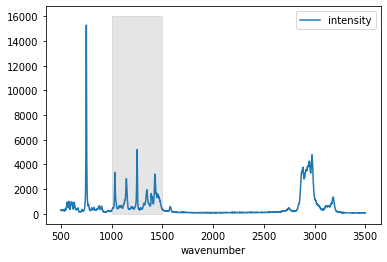

In [1]:
df.plot()

    ax = df.plot();
    x = np.linspace(1000, 1500)
    ax.fill_between(x, 0, 16000, color='gray', alpha=0.2)

    <Figure size 432x288 with 1 Axes>

![img](obipy-resources/ce78a4c1eacbbb3e62317b49f962b3502da46c3d/962db551529397b6ee216e10dfcfd9d1d4201550.png)



In [1]:
ax = df.plot();
x = np.linspace(1000, 1500)
ax.fill_between(x, 0, 16000, color='gray', alpha=0.2)

    <Figure size 432x288 with 1 Axes>

![img](obipy-resources/ce78a4c1eacbbb3e62317b49f962b3502da46c3d/962db551529397b6ee216e10dfcfd9d1d4201550.png)



### Reading data in Pandas



Let's get back to how we got the data into Pandas. Let's retrieve the data file we used before with several columns in it.



In [1]:
fname = '03-p-t.dat'
url = 'https://www.itl.nist.gov/div898/handbook/datasets/MODEL-4_4_4.DAT'

import urllib.request
urllib.request.urlretrieve(url, fname)

# Out [41]:
# text/plain
('03-p-t.dat', <http.client.HTTPMessage at 0x11ed4ae50>)

Let's refresh our memory of what is in this file:



In [1]:
! head 03-p-t.dat

# Out [42]:
# output
 Run          Ambient                            Fitted
Order  Day  Temperature  Temperature  Pressure    Value    Residual
 1      1      23.820      54.749      225.066   222.920     2.146
 2      1      24.120      23.323      100.331    99.411     0.920
 3      1      23.434      58.775      230.863   238.744    -7.881
 4      1      23.993      25.854      106.160   109.359    -3.199
 5      1      23.375      68.297      277.502   276.165     1.336
 6      1      23.233      37.481      148.314   155.056    -6.741
 7      1      24.162      49.542      197.562   202.456    -4.895
 8      1      23.667      34.101      138.537   141.770    -3.232

We use [Pandas.read\_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to read this, similar to how we used `numpy.loadtxt`. It also takes a lot of arguments to fine-tune the output. We use spaces as the delimiter here. `'\s+'` is a *regular expression* for multiple spaces. We still skip two rows, and we have to manually define the column names. We *do not* specify an index column here, we get a default one based on integers. Pandas is smart enough to recognize the first two columns are integers, so we do not have to do anything special here.



In [1]:
df = pd.read_csv('03-p-t.dat', delimiter='\s+', skiprows=2,
                 names=['Run order', 'Day', 'Ambient Temperature', 'Temperature',
                        'Pressure', 'Fitted Value', 'Residual'])
df

# Out [52]:
# text/plain
    Run order  Day  Ambient Temperature  Temperature  Pressure  Fitted Value  \
0           1    1               23.820       54.749   225.066       222.920
1           2    1               24.120       23.323   100.331        99.411
2           3    1               23.434       58.775   230.863       238.744
3           4    1               23.993       25.854   106.160       109.359
4           5    1               23.375       68.297   277.502       276.165
5           6    1               23.233       37.481   148.314       155.056
6           7    1               24.162       49.542   197.562       202.456
7           8    1               23.667       34.101   138.537       141.770
8           9    1               24.056       33.901   137.969       140.983
9          10    1               22.786       29.242   117.410       122.674
10         11    2               23.785       39.506   164.442       163.013
11         12    2               22.987       43

The default plot is not that nice.



# Out [53]:


# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

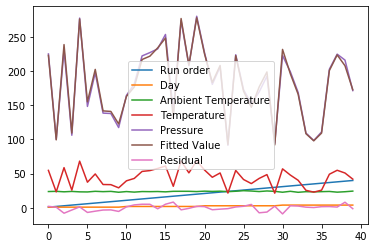

In [1]:
df.plot()

The default is to plot each column vs the index, which is not that helpful for us. Say we just want to plot the pressure vs. the temperature.



# Out [60]:


# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

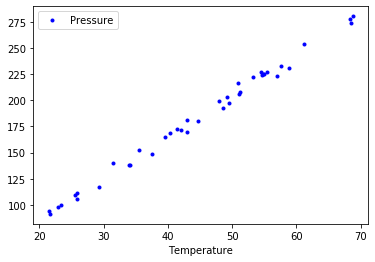

In [1]:
df.plot(x='Temperature', y='Pressure', style='b.')

We can add multiple plots to a figure, but we have to tell the subsequent calls which axes to put them on. To do that, save the first one, and pass it as an argument in subsequent plots.  That also allows you to fine-tune the plot appearance, e.g. add a y-label. See the [matplotlib documentation](https://matplotlib.org/contents.html) to learn how to set all of these.



# Out [62]:
# text/plain
Text(0, 0.5, 'values')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

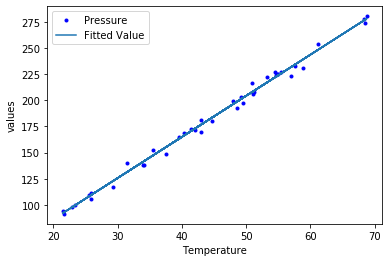

In [1]:
p1 = df.plot(x='Temperature', y='Pressure', style='b.')
df.plot(x='Temperature', y='Fitted Value', ax=p1)

p1.set_ylabel('values')

It is a reasonable question to ask if this is simpler than what we did before using arrays, variables and plotting commands. Dataframes are increasingly common in data science, and are the data structure used in many data science/machine learning projects.



## Another real-life example



LAMMPS is a molecular simulation code used to run molecular dynamics. It outputs a text file that is somewhat challenging to read. There are variable numbers of time steps that depend on how the simulation was setup.

Start by downloading and opening this file. It is a molecular dynamics trajectory at constant volume, where the pressure, temperature and energy fluctuate.



In [1]:
url = 'https://drive.google.com/uc?id=1FVQi4SsSAt7LiqZgDvltmQVaBIkM8AIk'

import urllib.request
urllib.request.urlretrieve(url, '03-log1.lammps')

# Out [18]:
# text/plain
('03-log1.lammps', <http.client.HTTPMessage at 0x123b32b10>)

Open this file to get a sense for what is in it. The data starts around:

    timestep 0.005
    run ${runSteps}
    run 500000
    Per MPI rank memory allocation (min/avg/max) = 4.427 | 4.427 | 4.427 Mbytes
    Step v_mytime Temp Press Volume PotEng TotEng v_pxy v_pxz v_pyz v_v11 v_v22 v_v33 CPU
           0            0         1025    601.28429    8894.6478   -1566.6216   -1500.5083    2065.6285    1713.4095    203.00499 1.3408976e-05 9.2260011e-06 1.2951038e-07            0 w

And it ends around this line.

      500000         2500    978.62359   -2100.7614    8894.6478   -1570.5382   -1507.4162   -252.80665    614.87398    939.65393 0.00045263648 0.00043970796 0.00044228719    1288.0233
    Loop time of 1288.02 on 1 procs for 500000 steps with 500 atoms

Our job is to figure out where those lines are so we can read them into Pandas. There are many ways to do this, but we will stick with a pure Python way. The strategy is to search for the lines, and keep track of their positions.



In [1]:
start, stop = None, None
with open('03-log1.lammps') as f:
    for i, line in enumerate(f):
        if line.startswith('Step v_mytime'):
            start = i
        if line.startswith('Loop time of '):
            stop = i - 1  # stop on the previous line
            break
start, stop

# Out [29]:
# text/plain
(69, 2570)

This gets tricky. We want to skip the rows up to the starting line. At that point, the line numbers restart as far as Pandas is concerned, so the header is in line 0 then, and the number of rows to read is defined by the stop line minus the start line. The values are separated by multiple spaces, so we use a *pattern* to indicate multiple spaces. Finally, we prevent the first column from being the index column by setting index\_col to be False. See [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html>)for all the details.



In [1]:
df = pd.read_csv('03-log1.lammps', skiprows=start, header=0, nrows=stop - start, delimiter='\s+', index_col=False)
df

:results:

            Step  v_mytime        Temp       Press     Volume     PotEng  \
    0          0         0  1025.00000   601.28429  8894.6478 -1566.6216
    1        200         1  1045.85100 -1974.43580  8894.6478 -1569.6934
    2        400         2  1050.44480  2974.54030  8894.6478 -1564.3755
    3        600         3  1071.37780  2386.37510  8894.6478 -1566.4325
    4        800         4  1055.52810  -661.78795  8894.6478 -1569.3172
    ...      ...       ...         ...         ...        ...        ...
    2496  499200      2496   977.95894 -1747.91220  8894.6478 -1570.0162
    2497  499400      2497  1066.50870   -77.15260  8894.6478 -1568.3816
    2498  499600      2498  1052.18860  1958.97410  8894.6478 -1565.8013
    2499  499800      2499  1057.30140 -1709.95670  8894.6478 -1570.6800
    2500  500000      2500   978.62359 -2100.76140  8894.6478 -1570.5382
    
             TotEng       v_pxy        v_pxz       v_pyz     v_v11     v_v22  \
    0    -1500.5083  2065.62850  1713.409500   203.00499  0.000013  0.000009
    1    -1502.2352  2530.16720 -2203.376800 -2193.88770  0.000423 -0.000564
    2    -1496.6210  1446.73930   637.829780  1794.70610  0.001115  0.000125
    3    -1497.3278   599.73943  -462.748090   558.54192  0.000766  0.000387
    4    -1501.2348  1775.43870 -1551.263500  -493.01032  0.000569  0.000380
    ...         ...         ...          ...         ...       ...       ...
    2496 -1506.9370  1411.85600  1154.883400 -2265.50500  0.000452  0.000440
    2497 -1499.5910  4071.88400  3847.295900 -1279.02860  0.000452  0.000440
    2498 -1497.9343 -2152.54460   925.775780 -1162.76120  0.000453  0.000439
    2499 -1502.4832 -1530.34090   -71.479217   731.44735  0.000453  0.000440
    2500 -1507.4162  -252.80665   614.873980   939.65393  0.000453  0.000440
    
                 v_v33          CPU
    0     1.295104e-07     0.000000
    1     9.109558e-04     0.505391
    2     4.583668e-04     1.018666
    3     3.082071e-04     1.532061
    4     2.913083e-04     2.051839
    ...            ...          ...
    2496  4.424962e-04  1285.960300
    2497  4.428113e-04  1286.474100
    2498  4.427215e-04  1286.987000
    2499  4.423706e-04  1287.503200
    2500  4.422872e-04  1288.023300
    
    [2501 rows x 14 columns]



### Visualizing the data



#### Plot a column



The effort was worth it though; look how easy it is to plot the data!



# Out [46]:


# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

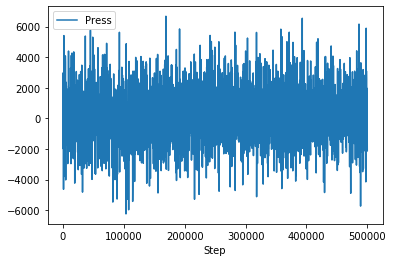

In [1]:
df.plot(x='Step', y='Press')

# Out [49]:
# text/plain
<Figure size 432x288 with 2 Axes>

# image/png

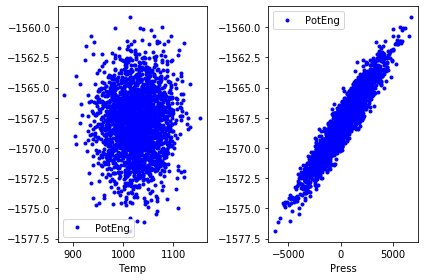

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(1, 2)
df.plot(x='Temp', y='PotEng', style='b.', ax=ax0)
df.plot(x='Press', y='PotEng', style='b.', ax=ax1)
plt.tight_layout()

#### Plot distributions of a column



We can look at histograms of properties as easily.



# Out [61]:
# text/plain
array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12706f550>]],
      dtype=object)

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

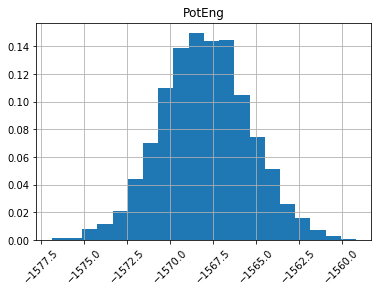

In [1]:
df.hist('PotEng', xrot=45, bins=20, density=True)

#### Plot column correlations



This is just the beginning of using Pandas. Suppose we want to see which columns are correlated ([https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)). With variables this would be tedious.



# Out [101]:


# text/plain
<Figure size 288x288 with 1 Axes>

# image/png

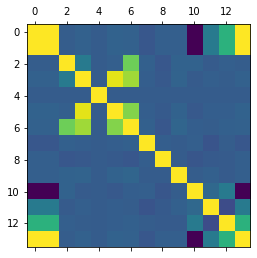

In [1]:
plt.matshow(df.corr())

It can be helpful to see what these correlations mean. Here we plot all the columns against each other. Note, it is not possible to plot a column against itself with Pandas (I think this is a bug [https://github.com/pandas-dev/pandas/issues/22088](https://github.com/pandas-dev/pandas/issues/22088)), so here I use matplotlib functions for the plotting. This should be symmetric, so I only plot the upper triangle.



# Out [123]:
# text/plain
<Figure size 576x576 with 169 Axes>

# image/png

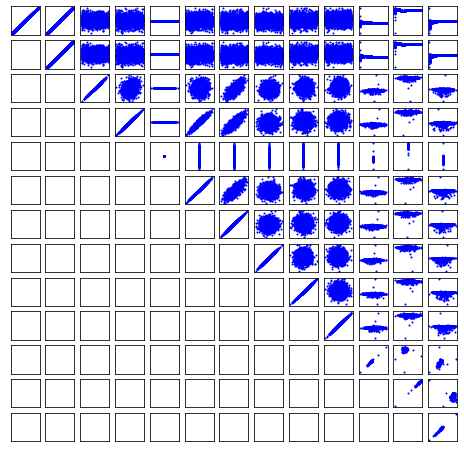

In [1]:
keys = df.keys()

fig, axs = plt.subplots(13, 13)
fig.set_size_inches((8, 8))
for i in range(13):
    for j in range(i, 13):
        axs[i, j].plot(df[keys[i]], df[keys[j]], 'b.', ms=2)
        # remove axes so it is easier to read
        axs[i, j].axes.get_xaxis().set_visible(False)
        axs[i, j].axes.get_yaxis().set_visible(False)
        axs[j, i].axes.get_xaxis().set_visible(False)
        axs[j, i].axes.get_yaxis().set_visible(False)

### Getting parts of a Pandas DataFrame



We have seen how to get a column from a DataFrame like this:



In [1]:
df['Press']

# Out [62]:
# text/plain
0        601.28429
1      -1974.43580
2       2974.54030
3       2386.37510
4       -661.78795
           ...
2496   -1747.91220
2497     -77.15260
2498    1958.97410
2499   -1709.95670
2500   -2100.76140
Name: Press, Length: 2501, dtype: float64

In this context, the DataFrame is acting like a dictionary. You can get a few columns by using a list of column names.



In [1]:
df[['Press', 'PotEng']]

# Out [63]:
# text/plain
           Press     PotEng
0      601.28429 -1566.6216
1    -1974.43580 -1569.6934
2     2974.54030 -1564.3755
3     2386.37510 -1566.4325
4     -661.78795 -1569.3172
...          ...        ...
2496 -1747.91220 -1570.0162
2497   -77.15260 -1568.3816
2498  1958.97410 -1565.8013
2499 -1709.95670 -1570.6800
2500 -2100.76140 -1570.5382
:
[2501 rows x 2 columns]

What about a row? This is what we would have done with a numpy array, but it just doesn't work here.



In [1]:
df[0]

# Out [64]:
# output

KeyErrorTraceback (most recent call last)
~/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   2645             try:
-> 2646                 return self._engine.get_loc(key)
   2647             except KeyError:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 0

During handling of the above exception, another exception occurred:

KeyErrorTraceback (most recent call last)
<ipython-input-64-ad11118bc8f3> in <module>
----> 1 df[0]

~/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py in __getitem__(self, key)
   2798             if self.columns.nlevels > 1:
   2799                 return self._getitem_multile

The problem is that as a dictionary, the keys are for the *columns*.



In [1]:
df.keys()

# Out [72]:
# text/plain
Index(['Step', 'v_mytime', 'Temp', 'Press', 'Volume', 'PotEng', 'TotEng',
       'v_pxy', 'v_pxz', 'v_pyz', 'v_v11', 'v_v22', 'v_v33', 'CPU'],
      dtype='object')

One way to get the rows by their integer index is to use the *integer location* attribute for a row.



In [1]:
df.iloc[0]

# Out [65]:
# text/plain
Step        0.000000e+00
v_mytime    0.000000e+00
Temp        1.025000e+03
Press       6.012843e+02
Volume      8.894648e+03
PotEng     -1.566622e+03
TotEng     -1.500508e+03
v_pxy       2.065628e+03
v_pxz       1.713409e+03
v_pyz       2.030050e+02
v_v11       1.340898e-05
v_v22       9.226001e-06
v_v33       1.295104e-07
CPU         0.000000e+00
Name: 0, dtype: float64

We can use slices on this.



In [1]:
df.iloc[0:5]

# Out [66]:
# text/plain
   Step  v_mytime       Temp       Press     Volume     PotEng     TotEng  \
0     0         0  1025.0000   601.28429  8894.6478 -1566.6216 -1500.5083
1   200         1  1045.8510 -1974.43580  8894.6478 -1569.6934 -1502.2352
2   400         2  1050.4448  2974.54030  8894.6478 -1564.3755 -1496.6210
3   600         3  1071.3778  2386.37510  8894.6478 -1566.4325 -1497.3278
4   800         4  1055.5281  -661.78795  8894.6478 -1569.3172 -1501.2348
:
        v_pxy       v_pxz       v_pyz     v_v11     v_v22         v_v33  \
0  2065.62850  1713.40950   203.00499  0.000013  0.000009  1.295104e-07
1  2530.16720 -2203.37680 -2193.88770  0.000423 -0.000564  9.109558e-04
2  1446.73930   637.82978  1794.70610  0.001115  0.000125  4.583668e-04
3   599.73943  -462.74809   558.54192  0.000766  0.000387  3.082071e-04
4  1775.43870 -1551.26350  -493.01032  0.000569  0.000380  2.913083e-04
:
        CPU
0  0.000000
1  0.505391
2  1.018666
3  1.532061
4  2.051839

This example may be a little confusing, because our index does include 0, so we can in this case also use the row label with the *location* attribute. You can use any value in the index for this.



In [1]:
df.index

# Out [75]:
# text/plain
RangeIndex(start=0, stop=2501, step=1)

In [1]:
df.loc[0]

# Out [67]:
# text/plain
Step        0.000000e+00
v_mytime    0.000000e+00
Temp        1.025000e+03
Press       6.012843e+02
Volume      8.894648e+03
PotEng     -1.566622e+03
TotEng     -1.500508e+03
v_pxy       2.065628e+03
v_pxz       1.713409e+03
v_pyz       2.030050e+02
v_v11       1.340898e-05
v_v22       9.226001e-06
v_v33       1.295104e-07
CPU         0.000000e+00
Name: 0, dtype: float64

We can access the first five rows like this.



In [1]:
df.loc[0:4]

# Out [70]:
# text/plain
   Step  v_mytime       Temp       Press     Volume     PotEng     TotEng  \
0     0         0  1025.0000   601.28429  8894.6478 -1566.6216 -1500.5083
1   200         1  1045.8510 -1974.43580  8894.6478 -1569.6934 -1502.2352
2   400         2  1050.4448  2974.54030  8894.6478 -1564.3755 -1496.6210
3   600         3  1071.3778  2386.37510  8894.6478 -1566.4325 -1497.3278
4   800         4  1055.5281  -661.78795  8894.6478 -1569.3172 -1501.2348
:
        v_pxy       v_pxz       v_pyz     v_v11     v_v22         v_v33  \
0  2065.62850  1713.40950   203.00499  0.000013  0.000009  1.295104e-07
1  2530.16720 -2203.37680 -2193.88770  0.000423 -0.000564  9.109558e-04
2  1446.73930   637.82978  1794.70610  0.001115  0.000125  4.583668e-04
3   599.73943  -462.74809   558.54192  0.000766  0.000387  3.082071e-04
4  1775.43870 -1551.26350  -493.01032  0.000569  0.000380  2.913083e-04
:
        CPU
0  0.000000
1  0.505391
2  1.018666
3  1.532061
4  2.051839

And a slice of a column like this.



In [1]:
df.loc[0:4, 'Press']

# Out [71]:
# text/plain
0     601.28429
1   -1974.43580
2    2974.54030
3    2386.37510
4    -661.78795
Name: Press, dtype: float64

We can access a value in a row and column with the `at` function on a DataFrame.



In [1]:
df.at[2, 'Press']

# Out [68]:
# text/plain
2974.5403

Or if you know the row and column numbers you can use `iat`.



In [1]:
df.iat[2, 3]

# Out [69]:
# text/plain
2974.5403

### Operating on columns in the DataFrame



Some functions just work across the columns. For example, DataFrames have statistics functions like this.



In [1]:
df.mean()

# Out [76]:
# text/plain
Step        250000.000000
v_mytime      1250.000000
Temp          1025.136938
Press          188.035304
Volume        8894.647800
PotEng       -1567.935373
TotEng       -1501.813207
v_pxy           16.669575
v_pxz           -4.852837
v_pyz           14.175372
v_v11            0.000465
v_v22            0.000429
v_v33            0.000428
CPU            644.103768
dtype: float64

We should tread carefully with other functions that work on arrays. For example consider this example that computes the mean of an entire array.



In [1]:
a = np.array([[1, 1, 1],
              [2, 2, 2]])
np.mean(a)

# Out [83]:
# text/plain
1.5

It does not do the same thing on a DataFrame. The index and column labels are preserved with numpy functions.



In [1]:
import numpy as np

np.mean(df) # takes mean along axis 0

# Out [82]:
# text/plain
Step        250000.000000
v_mytime      1250.000000
Temp          1025.136938
Press          188.035304
Volume        8894.647800
PotEng       -1567.935373
TotEng       -1501.813207
v_pxy           16.669575
v_pxz           -4.852837
v_pyz           14.175372
v_v11            0.000465
v_v22            0.000429
v_v33            0.000428
CPU            644.103768
dtype: float64

In [1]:
np.max(df)

# Out [84]:
# text/plain
Step        500000.000000
v_mytime      2500.000000
Temp          1154.179000
Press         6673.763400
Volume        8894.647800
PotEng       -1559.155500
TotEng       -1488.958600
v_pxy         7428.176700
v_pxz         6523.454800
v_pyz         6229.504300
v_v11            0.001115
v_v22            0.000531
v_v33            0.000911
CPU           1288.023300
dtype: float64

In [1]:
np.exp(df)

# Out [85]:
# output
/Users/jkitchin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.

# text/plain
               Step   v_mytime  Temp          Press  Volume  PotEng  TotEng  \
0      1.000000e+00   1.000000   inf  1.362854e+261     inf     0.0     0.0
1      7.225974e+86   2.718282   inf   0.000000e+00     inf     0.0     0.0
2     5.221470e+173   7.389056   inf            inf     inf     0.0     0.0
3     3.773020e+260  20.085537   inf            inf     inf     0.0     0.0
4               inf  54.598150   inf  3.882801e-288     inf     0.0     0.0
...             ...        ...   ...            ...     ...     ...     ...
2496            inf        inf   inf   0.000000e+00     inf     0.0     0.0
2497            inf        inf   inf   3.112086e-34     inf     0.0     0.0
2498            inf        inf   inf            inf     inf     0.0     0.0
2499            inf      

In [1]:
2 * df

# Out [86]:
# text/plain
         Step  v_mytime        Temp       Press      Volume     PotEng  \
0           0         0  2050.00000  1202.56858  17789.2956 -3133.2432
1         400         2  2091.70200 -3948.87160  17789.2956 -3139.3868
2         800         4  2100.88960  5949.08060  17789.2956 -3128.7510
3        1200         6  2142.75560  4772.75020  17789.2956 -3132.8650
4        1600         8  2111.05620 -1323.57590  17789.2956 -3138.6344
...       ...       ...         ...         ...         ...        ...
2496   998400      4992  1955.91788 -3495.82440  17789.2956 -3140.0324
2497   998800      4994  2133.01740  -154.30520  17789.2956 -3136.7632
2498   999200      4996  2104.37720  3917.94820  17789.2956 -3131.6026
2499   999600      4998  2114.60280 -3419.91340  17789.2956 -3141.3600
2500  1000000      5000  1957.24718 -4201.52280  17789.2956 -3141.0764
:
         TotEng       v_pxy        v_pxz       v_pyz     v_v11     v_v22  \
0    -3001.0166  4131.25700  3426.819000  

We can apply a function to the DataFrame. The default is the columns (axis=0). Either way, we get a new DataFrame.



In [1]:
def minmax(roworcolumn):
    return np.min(roworcolumn), np.max(roworcolumn)

df.apply(minmax)

# Out [96]:
# text/plain
Step                               (0.0, 500000.0)
v_mytime                             (0.0, 2500.0)
Temp               (883.05875, 1154.1789999999999)
Press                      (-6247.6768, 6673.7634)
Volume                      (8894.6478, 8894.6478)
PotEng                    (-1576.8745, -1559.1555)
TotEng                    (-1513.6955, -1488.9586)
v_pxy                      (-6747.6227, 7428.1767)
v_pxz                      (-7547.8097, 6523.4548)
v_pyz                      (-7509.4468, 6229.5043)
v_v11       (1.3408976000000001e-05, 0.0011154527)
v_v22              (-0.00056416838, 0.00053057745)
v_v33               (1.2951038e-07, 0.00091095575)
CPU                               (0.0, 1288.0233)
dtype: object

Here we analyze across the rows.



In [1]:
df.apply(minmax, axis=1)

# Out [97]:
# text/plain
0       (-1566.6216, 8894.6478)
1       (-2203.3768, 8894.6478)
2       (-1564.3755, 8894.6478)
3       (-1566.4325, 8894.6478)
4       (-1569.3172, 8894.6478)
                 ...
2496      (-2265.505, 499200.0)
2497     (-1568.3816, 499400.0)
2498     (-2152.5446, 499600.0)
2499     (-1709.9567, 499800.0)
2500     (-2100.7614, 500000.0)
Length: 2501, dtype: object